In [82]:
import numpy as np
import pandas as pd
import networkx as nx
import json
import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cwd = os.getcwd()

dir_as_list = cwd.split('/')
base_path=''
go = True
i=0
while go:
    base_path= base_path+dir_as_list[i]+'/'
    if dir_as_list[i]=='research':
        go = False
    i=i+1
    
rel_path = "sample-graphs/sourcecred_sourcecred.json"

abs_file_path = os.path.abspath(os.path.join(base_path, rel_path))

In [3]:
with open(abs_file_path) as json_file:  
    data = json.load(json_file)

In [4]:
import sys
infra_path = 'infra/'
sys.path.insert(0, os.path.join(base_path, infra_path))
import import_graph as ig

In [5]:
G = ig.json_to_graph(data)

In [6]:
iterations = 20


alpha = 0
seed = {n:1/len(G.nodes) for n in G.nodes}
self_loop_wt = 1/1000


In [7]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=True,
                         lazy_decay=True,
                         self_loop_wt=self_loop_wt)

(array([2.000e+00, 2.000e+00, 1.000e+00, 6.100e+01, 2.197e+03, 1.701e+03,
        9.950e+02, 5.620e+02, 5.340e+02, 2.100e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00]),
 array([-6.62996101, -6.22943603, -5.82891105, -5.42838607, -5.0278611 ,
        -4.62733612, -4.22681114, -3.82628616, -3.42576119, -3.02523621,
        -2.62471123, -2.22418626, -1.82366128, -1.4231363 , -1.02261132,
        -0.62208635]),
 <a list of 15 Patch objects>)

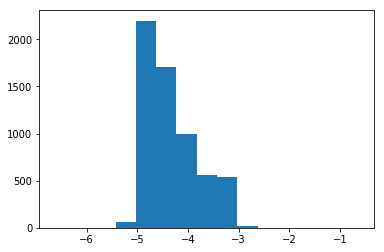

In [8]:
plt.hist(np.log10(r), bins = 15)

In [24]:
node_types = {g.node[n]['type'] for n in g.nodes }

In [25]:
print(node_types)

{'github/review', 'github/comment', 'github/pull', 'github/issue', 'github/user', 'github/repo', 'git/commit'}


In [26]:
edge_types = {g.edges[e]['type'] for e in g.edges }

In [27]:
print(edge_types)

{'github/authors', 'github/reactsHeart', 'github/mentionsAuthor', 'github/reactsThumbsUp', 'github/reactsRocket', 'github/hasParent', 'github/references', 'github/reactsHooray', 'git/hasParent', 'github/mergedAs'}


In [34]:
def edge_count(g,src,dst):
    i =0
    stop = False
    while not(stop):
        try:
            g.edges[(src,dst,i)]
            i=i+1
        except:
            stop = True
            return i

In [72]:
for i in g.nodes:
    g.nodes[i]["edge_types"] = {g.edges[(i,j, k)]['type'] for j in g.nodes[i]["out_nbr"] for k in range(edge_count(g,i,j,))}

In [88]:
node = 6077
print(g.nodes[node]['type'])
print(g.nodes[node]['edge_types'])

github/user
{'github/authors', 'github/reactsHeart', 'github/reactsThumbsUp', 'github/reactsRocket', 'github/reactsHooray'}


In [92]:
print(g.nodes[node]['address'])
print(g.nodes[node]['score'])

('sourcecred', 'github', 'USERLIKE', 'USER', 'wchargin')
0.05120050348857681


In [75]:
def get_nodes_by_type(g, node_type_selection):
    return [node for node in g.nodes if g.nodes[node]['type']== node_type_selection ]


In [76]:
nodes_by_type = {key:get_nodes_by_type(g, key) for key in node_types }

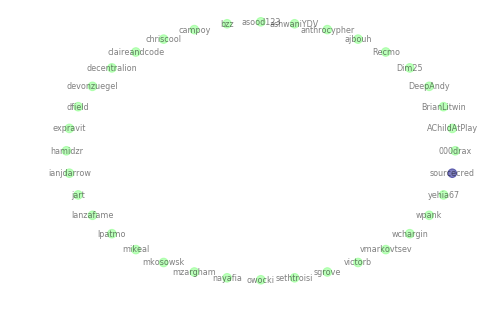

In [81]:
filtered = nodes_by_type['github/user']+nodes_by_type['github/repo']
isg.inspectSubGraph(g, filtered, expand=False, verbose=False, label=True,pos = "kk")

In [93]:
filtered_data = {g.nodes[node]['address'][4]:g.nodes[node]['score'] for node in filtered}

Text(0.5, 1.0, 'pagerank')

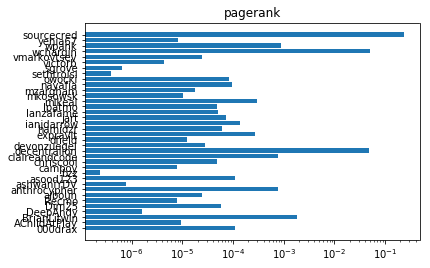

In [108]:
plt.barh(range(len(filtered_data)), list(filtered_data.values()), align='center')
plt.yticks(range(len(filtered_data)), list(filtered_data.keys()))
plt.xscale('log')
plt.title('pagerank')

In [111]:
comments = get_nodes_by_type(g, 'github/comment')

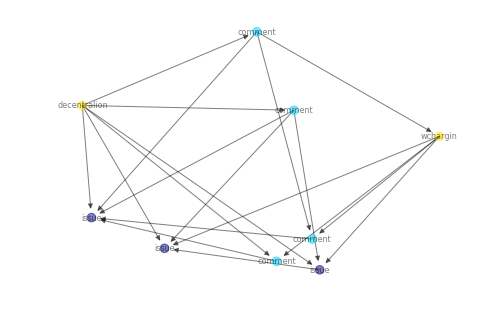

In [129]:
isg.inspectSubGraph(g, comments[:3], expand=True, verbose=False, label=True,pos = "kk")

In [126]:
issues = get_nodes_by_type(g, 'github/issue')

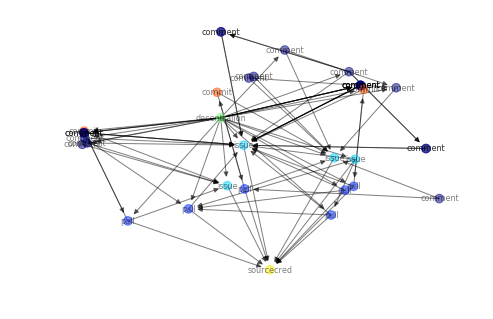

In [132]:
isg.inspectSubGraph(g, issues[:3], expand=True, verbose=False, label=True,pos = "kk")

In [134]:
g.nodes[issues[0]]

{'address': ('sourcecred',
  'github',
  'ISSUE',
  'sourcecred',
  'sourcecred',
  '1004'),
 'type': 'github/issue',
 'score': 0.0008531830868746338,
 'all_nbr': {447,
  899,
  900,
  901,
  902,
  903,
  904,
  905,
  906,
  907,
  908,
  909,
  1298,
  1304,
  1306,
  1308,
  3279,
  3471,
  3477,
  3478,
  3479,
  4392,
  6059},
 'in_nbr': {447,
  899,
  900,
  901,
  902,
  903,
  904,
  905,
  906,
  907,
  908,
  909,
  1298,
  1304,
  1306,
  1308,
  3279,
  3471,
  3477,
  3478,
  3479,
  6059},
 'out_nbr': {4392},
 'self_wt': 0.001,
 'total_wt': 9.251000000000001,
 'edge_types': {'github/hasParent'},
 'color': (0.0, 0.8176470588235294, 1.0, 1.0),
 'label': 'issue'}

In [10]:
#df.apply(np.log10).plot(legend=False, figsize=(20,10),alpha=.5)

In [11]:
top25 = list(df.T.reset_index().sort_values(iterations).tail(25).index)

In [45]:
top25

[4060,
 3279,
 3858,
 3725,
 3532,
 3471,
 3997,
 3772,
 3460,
 4057,
 3453,
 3549,
 3484,
 4229,
 3468,
 3424,
 3852,
 3458,
 3383,
 3356,
 6047,
 3379,
 6059,
 6077,
 4392]

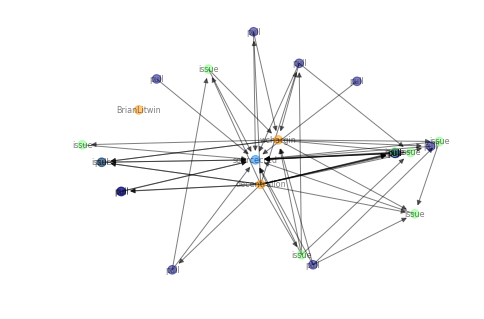

In [120]:
isg.inspectSubGraph(g,top25, expand=False, verbose=False, label=True,pos = "kk")